In [13]:
import pandas as pd

df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


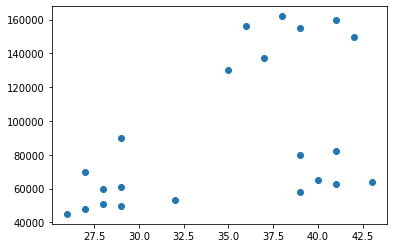

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(df['Age'], df['Income($)'])

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
df['target'] = model.fit_predict(df[['Age', 'Income($)']])

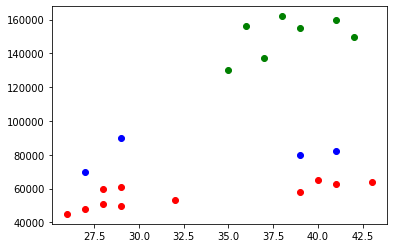

In [16]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

- They seem to be not clustered as we intended this is because Age and Income are not scaled.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income($)_sc'] = scaler.fit(df[['Income($)']]).transform(df[['Income($)']])

df['Age_sc'] = scaler.fit(df[['Age']]).transform(df[['Age']])
df.head()

,Name,Age,Income($),target,Income($)_sc,Age_sc
0,Rob,27,70000,2,0.213675,0.058824
1,Michael,29,90000,2,0.384615,0.176471
2,Mohan,29,61000,0,0.136752,0.176471
3,Ismail,28,60000,0,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


In [25]:
model = KMeans(n_clusters=3)
df['target'] = model.fit_predict(df[['Age_sc', 'Income($)_sc']])

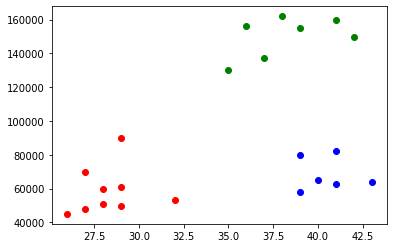

In [26]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

# Elbow point to find clusters

<img src="./assets/08.png" />
<img src="./assets/09.png" />

In [33]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df[['Age_sc', 'Income($)_sc']])
    sse.append(k_means.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009395,
 0.16869711728567788,
 0.13265419827245162,
 0.10383752586603562]

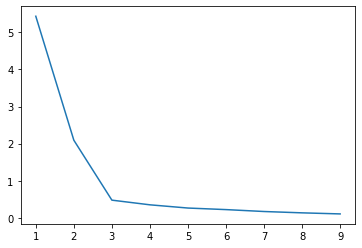

In [34]:
plt.plot(k_rng, sse)

- 3 is the elbow point